In [2]:
%matplotlib inline

In [3]:
import matplotlib as mpl
mpl.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')
import sys
sys.path.append('/home/apizzuto/Nova/scripts/')
from plotting import GRECOPlots
import matplotlib.pyplot as plt
import numpy as np

Setting up Analysis for:
GRECOv2.4
Setting up GRECOv2.4...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.


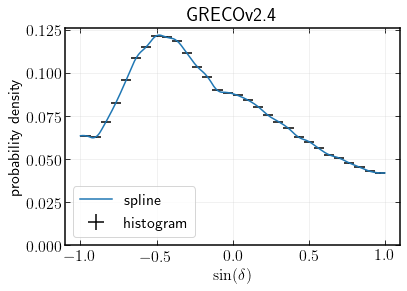

In [3]:
gplots = GRECOPlots()
gplots.declination_pdf()

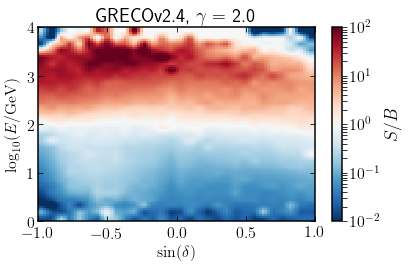

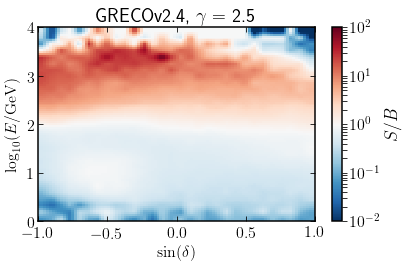

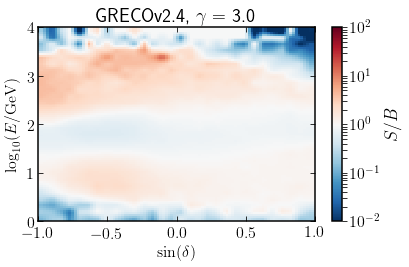

In [4]:
gplots.energy_pdf()

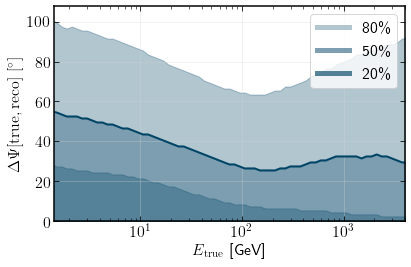

In [5]:
gplots.angular_error_plot()

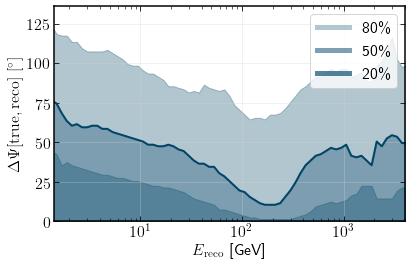

In [6]:
gplots.angular_error_plot(true_energy=False)

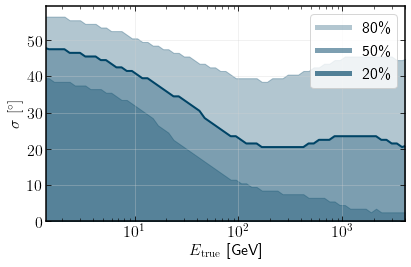

In [7]:
gplots.angular_error_plot(true_error=False)

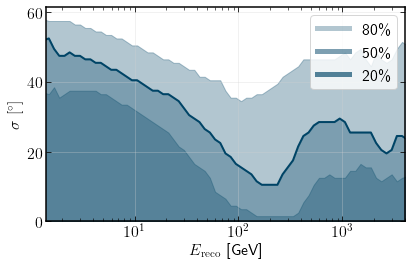

In [8]:
gplots.angular_error_plot(true_error=False, true_energy=False)

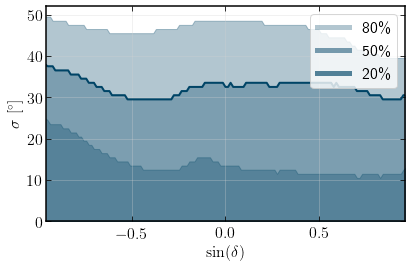

In [9]:
gplots.errors_vs_declination()

NameError: name 'mc' is not defined

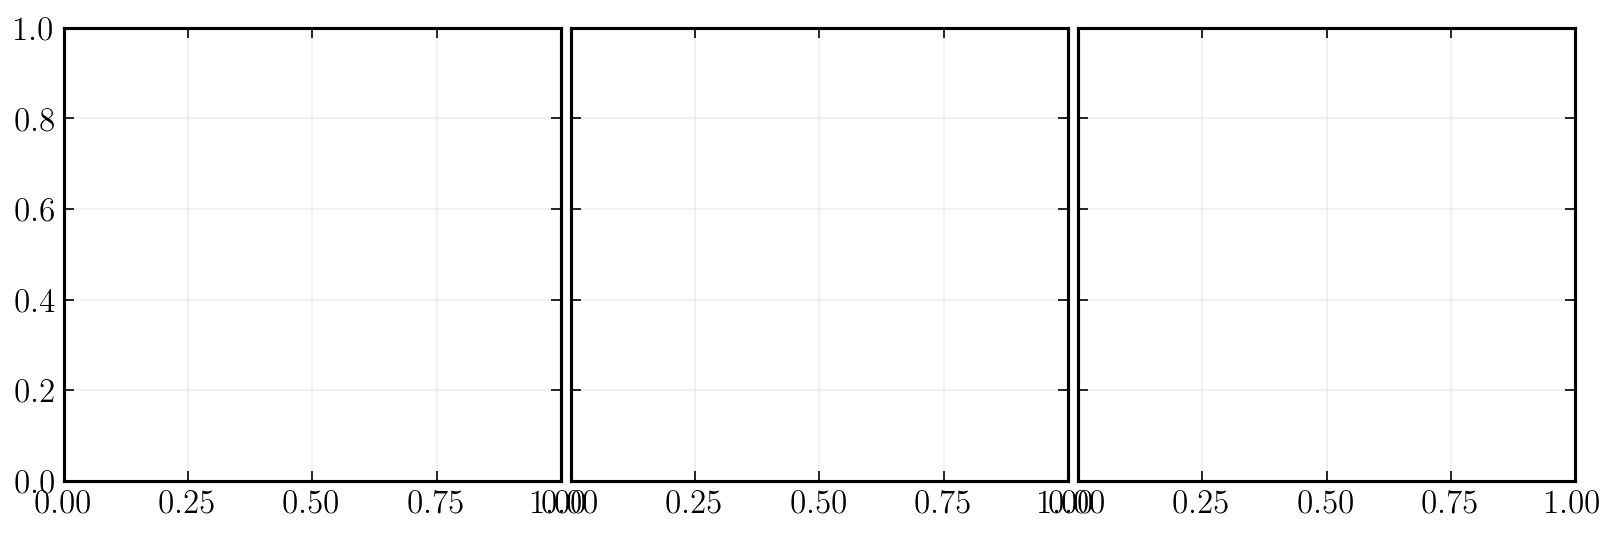

In [14]:
fig, aaxs = plt.subplots(nrows=1, ncols=3, figsize=(13,4), dpi=150, sharey=True)
plt.subplots_adjust(hspace=0.02, wspace=0.02)
axs = np.ravel(aaxs)
for ii, gamma in enumerate([2.0, 2.5, 3.0]):
    for e_cut in [0.0, 0.5, 1.0]:
        mc_msk = mc['logE'] > e_cut
        mc_cut = mc[mc_msk]

        delta_gamma = -gamma + 1.
        axs[ii].hist(mc_cut['trueE'], bins = np.logspace(-0.5, 4.0, 31), 
                 weights = mc_cut['ow'] * np.power(mc_cut['trueE'], delta_gamma) / mc_cut['trueE'],
                histtype = 'step', linewidth = 2., label=r'$\min\log_{10}(E) = $' + f" {e_cut:.1f}")

    axs[ii].set_yscale('log')
    axs[ii].set_xscale('log')
    axs[ii].set_xlim(4e-1, 3e3)
    axs[ii].set_xlabel(r'$E_{\nu}$ (GeV)', fontsize = 20)
    if ii == 0:
        axs[ii].set_ylabel('$N$ per bin (au)', fontsize=20)
    if ii == 0:
        axs[ii].legend(loc=4, fontsize=14, frameon=False)
    axs[ii].set_title(r'$\gamma = $' + f"{gamma:.1f}")
plt.show()

In [ ]:
for cut in [0.0, 0.5, 1.0]:
    mc_msk = sig.log10energy > cut
    masked_sig = sig[mc_msk]
    print(len(masked_sig))

    fig, ax = plt.subplots()
    h = hl.hist(masked_sig.dpsi/masked_sig.sigma * 1.0, 
                masked_sig.oneweight*masked_sig.true_energy**-2,
                bins=np.r_[:180:.05]).normalize()
    hl.plot1d(ax, h, crosses=True, label=r'$E^{-2}$ MC')
    x = h.centers[0]
    ax.plot(x, stats.rayleigh.pdf(x), label='Rayleigh expectation')
    ax.set_xlim(0, 5)
    ax.set_ylim(0)
    ax.set_xlabel(r'$\Delta\Psi/\sigma$')
    ax.set_ylabel(r'probability density')
    ax.legend()
    plt.tight_layout()
    
    plt.show()

# Synthesis plots

In [4]:
from importlib import reload
import plotting
reload(plotting)

<module 'plotting' from '/home/apizzuto/Nova/scripts/plotting.py'>

In [5]:
new_plots = plotting.SynthesisPlots()

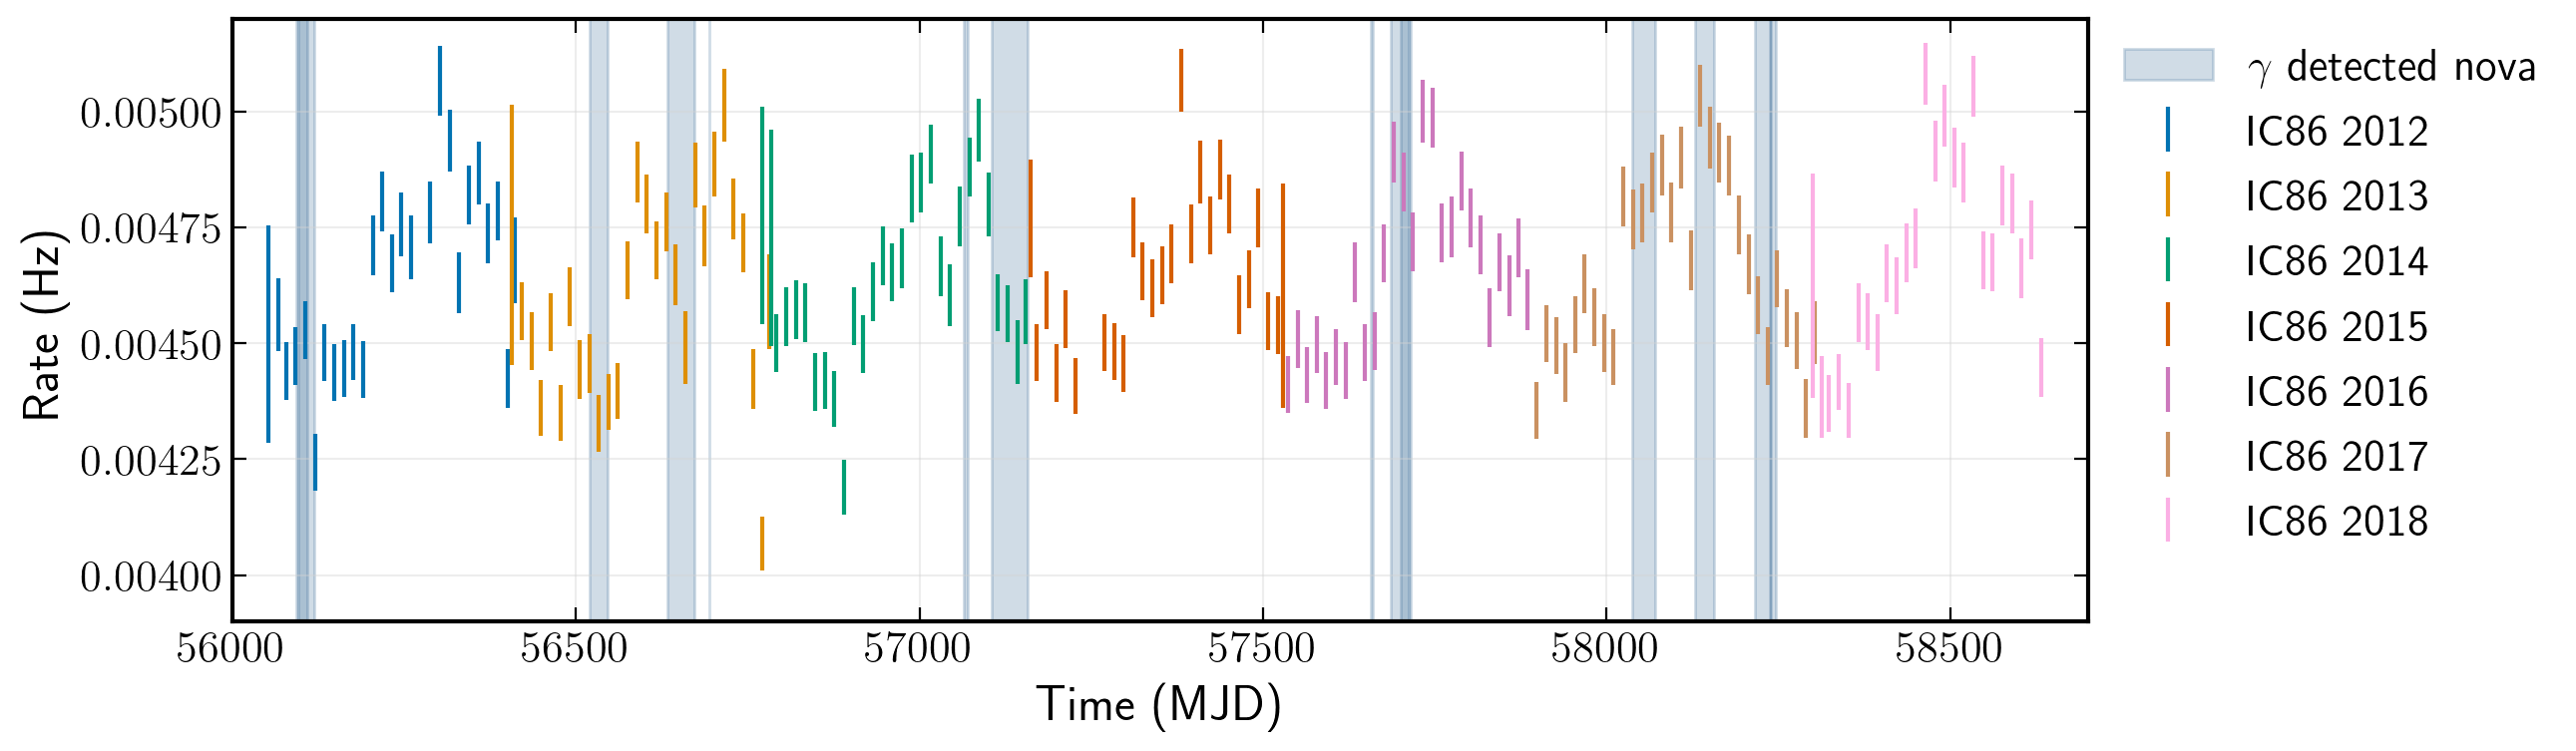

In [6]:
new_plots.gamma_lightcurve_with_greco_rate()

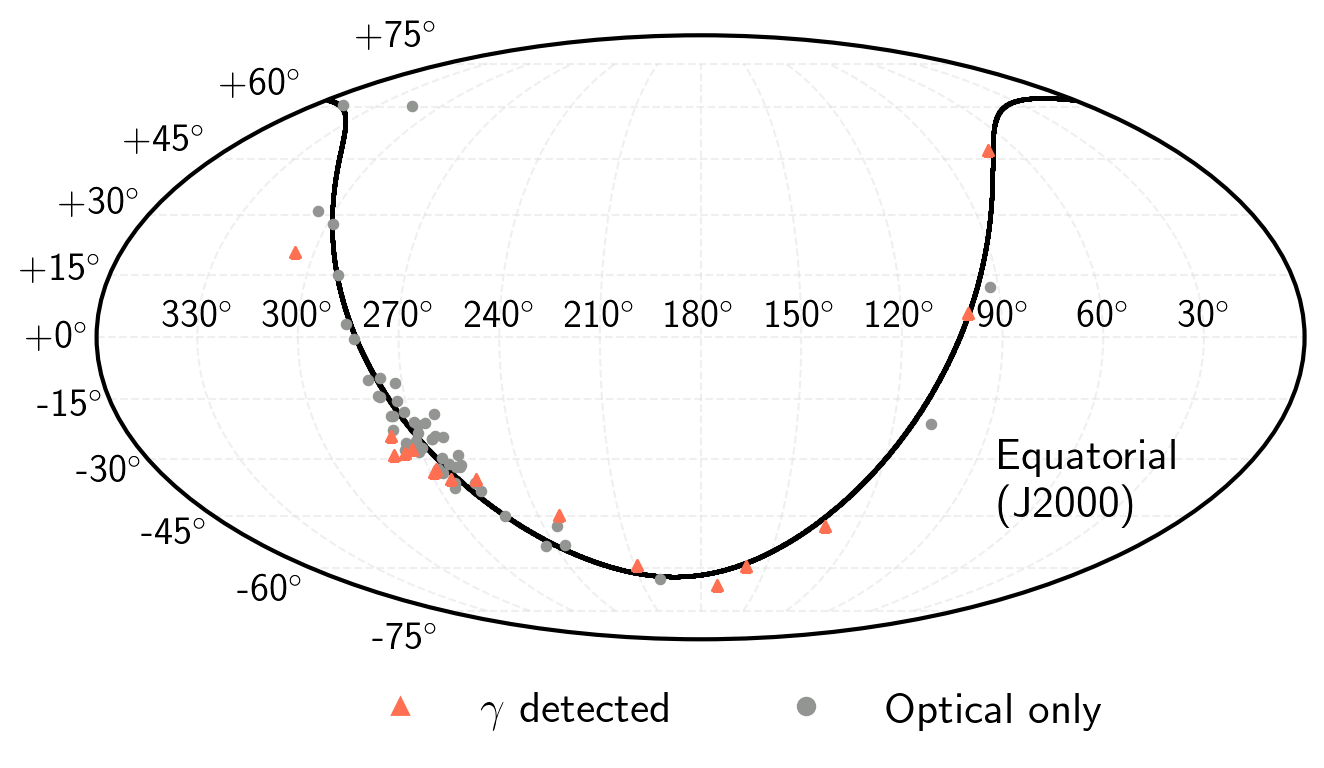

In [7]:
new_plots.all_sky_scatter_plot()

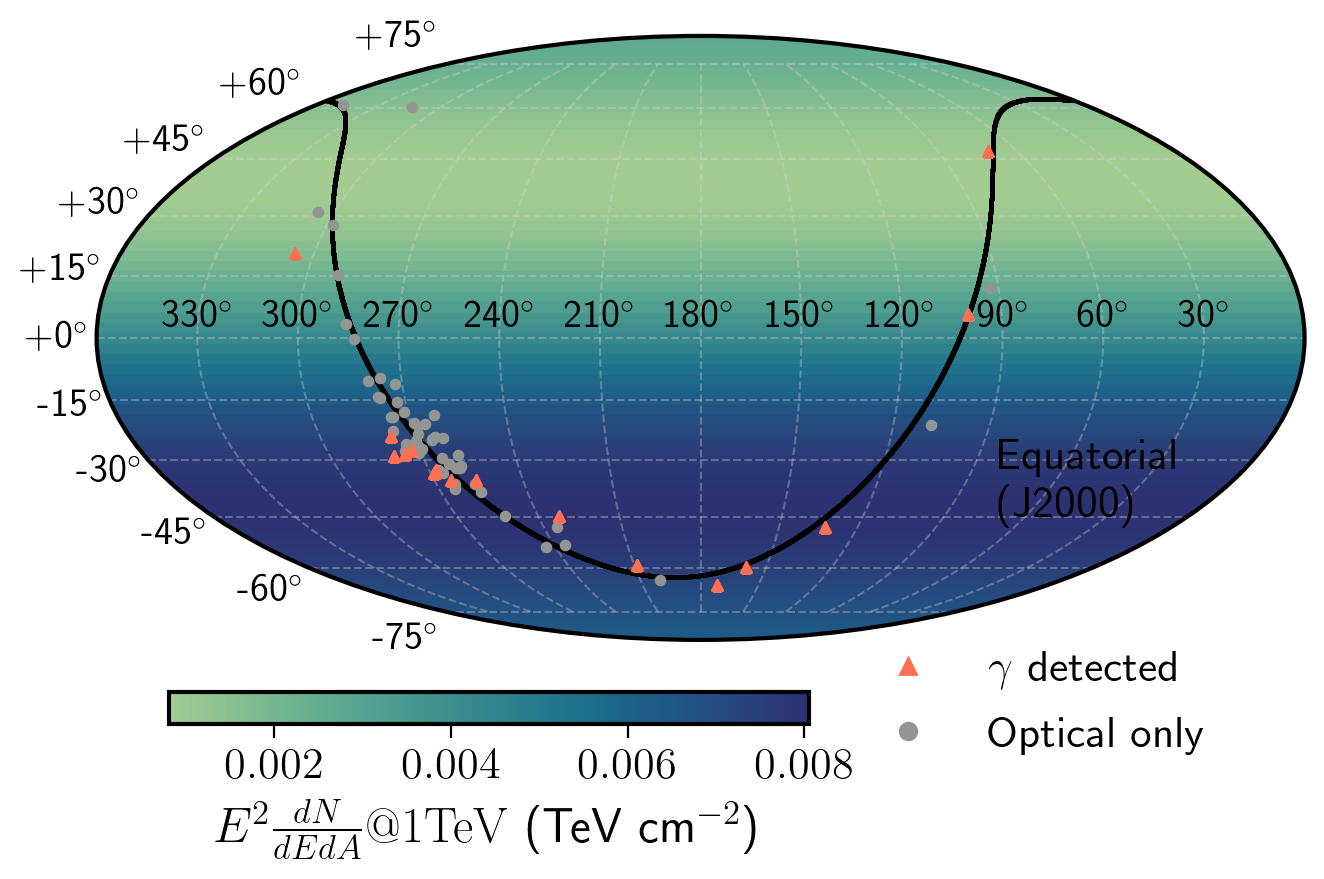

In [8]:
reload(plotting)
new_plots = plotting.SynthesisPlots()
new_plots.mollview_with_sensitivity()
# plt.savefig('/home/apizzuto/public_html/novae/all_sky_novae_with_sens.png', dpi=180, bbox_inches='tight')

In [25]:
plt.plot(np.sin(np.radians(lat)), sens, marker='o', linestyle='')
plt.plot(np.sin(np.array(sens_vs_dec['dec'])), np.array(sens_vs_dec['sens']))
plt.show()

NameError: name 'lat' is not defined

In [8]:
from scipy.interpolate import UnivariateSpline
sens_vs_dec = np.load('/data/user/apizzuto/Nova/csky_trials/sens_vs_dec/' 
            + 'sens_vs_dec_delta_t_8.64e+04_gamma_2.0_allflavor_True_trials.pkl',
            allow_pickle=True)
spl = UnivariateSpline(np.sin(np.array(sens_vs_dec['dec'])), 
        np.array(sens_vs_dec['sens']))

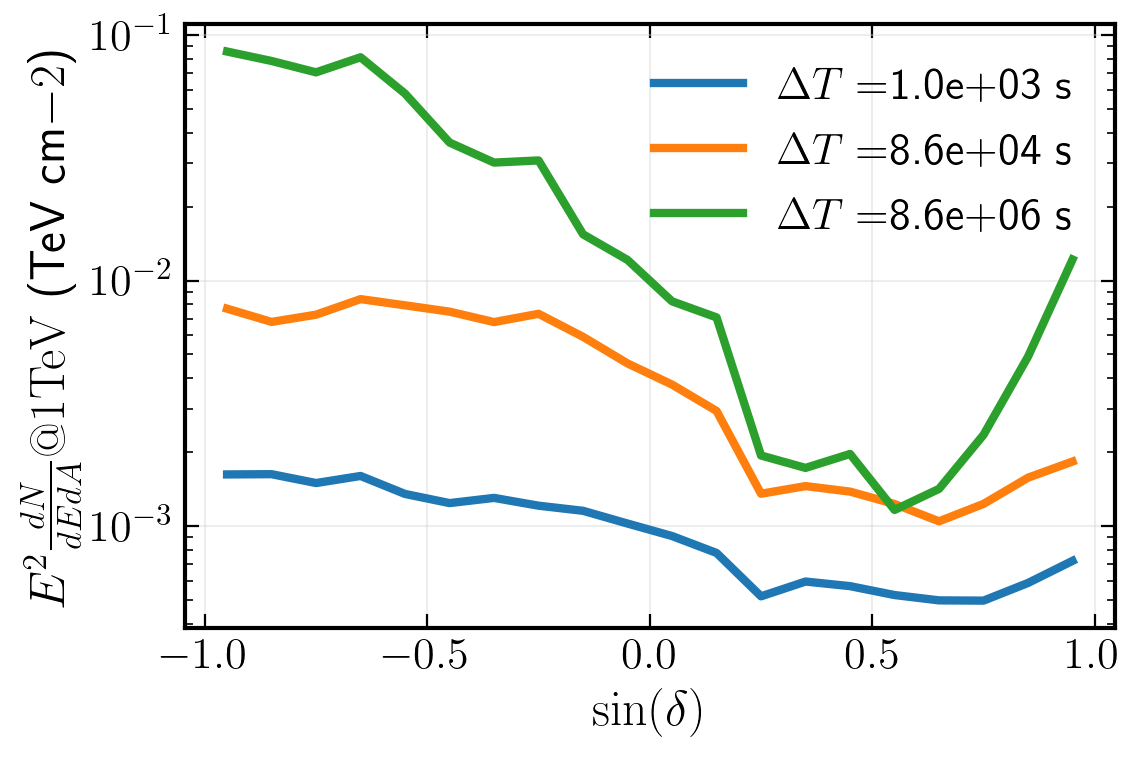

In [10]:
fig = plt.subplots(dpi=200)

for del_t in [1000., 86400., 8640000.]:
    sens_vs_dec = np.load('/data/user/apizzuto/Nova/csky_trials/sens_vs_dec/' 
                + f'sens_vs_dec_delta_t_{del_t:.2e}_gamma_2.0_allflavor_True_trials.pkl',
                allow_pickle=True)

    plt.plot(np.sin(np.array(sens_vs_dec['dec'])), np.array(sens_vs_dec['sens']), lw=3.,
            label=r'$\Delta T = $' + f'{del_t:.1e} s')
    
plt.yscale('log')
plt.ylabel(r'$E^2 \frac{dN}{dEdA} @ $' +
    r'$1 \mathrm{TeV}$ (TeV cm${-2}$)')
plt.xlabel(r'$\sin(\delta)$')
plt.legend(loc=1, frameon=False)
plt.show()

In [12]:
sens_vs_dec

{'dec': [-1.253235897503375,
  -1.015985293814825,
  -0.848062078981481,
  -0.7075844367253554,
  -0.5823642378687435,
  -0.4667653390472964,
  -0.35757110364551026,
  -0.25268025514207865,
  -0.15056827277668605,
  -0.05002085680577006,
  0.050020856805769946,
  0.15056827277668594,
  0.25268025514207865,
  0.35757110364551015,
  0.46676533904729633,
  0.5823642378687433,
  0.7075844367253554,
  0.848062078981481,
  1.0159852938148248,
  1.253235897503375],
 'sens': [0.001521037721158698,
  0.0014992015121676598,
  0.0014275337034507368,
  0.0015293183629138101,
  0.0013279915380697215,
  0.0012275017122797692,
  0.0013177803012610254,
  0.0011779261150328519,
  0.0013443130420763836,
  0.0009674283975298252,
  0.0008341526490605093,
  inf,
  0.0006736323785127189,
  0.0006242802445369773,
  0.00047525810684270287,
  0.00045163940183577954,
  0.0005647765663943127,
  0.0004342555026868647,
  0.0005998195183417974,
  0.0007688249020886887],
 'sens_nsig': [2.54864560161738,
  2.55185555

In [32]:
10.**52.78526168658858

6.099042878096284e+52

NameError: name 'master' is not defined